<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/Boosting_method/01_AdaBoosting_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("mushrooms.csv")

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

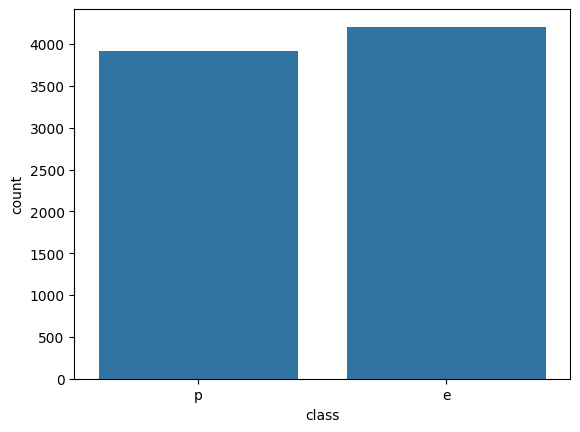

In [6]:
sns.countplot(data=df, x= 'class')

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [13]:
feat_uniq = df.describe().transpose().reset_index().sort_values('unique')

<Axes: xlabel='index', ylabel='unique'>

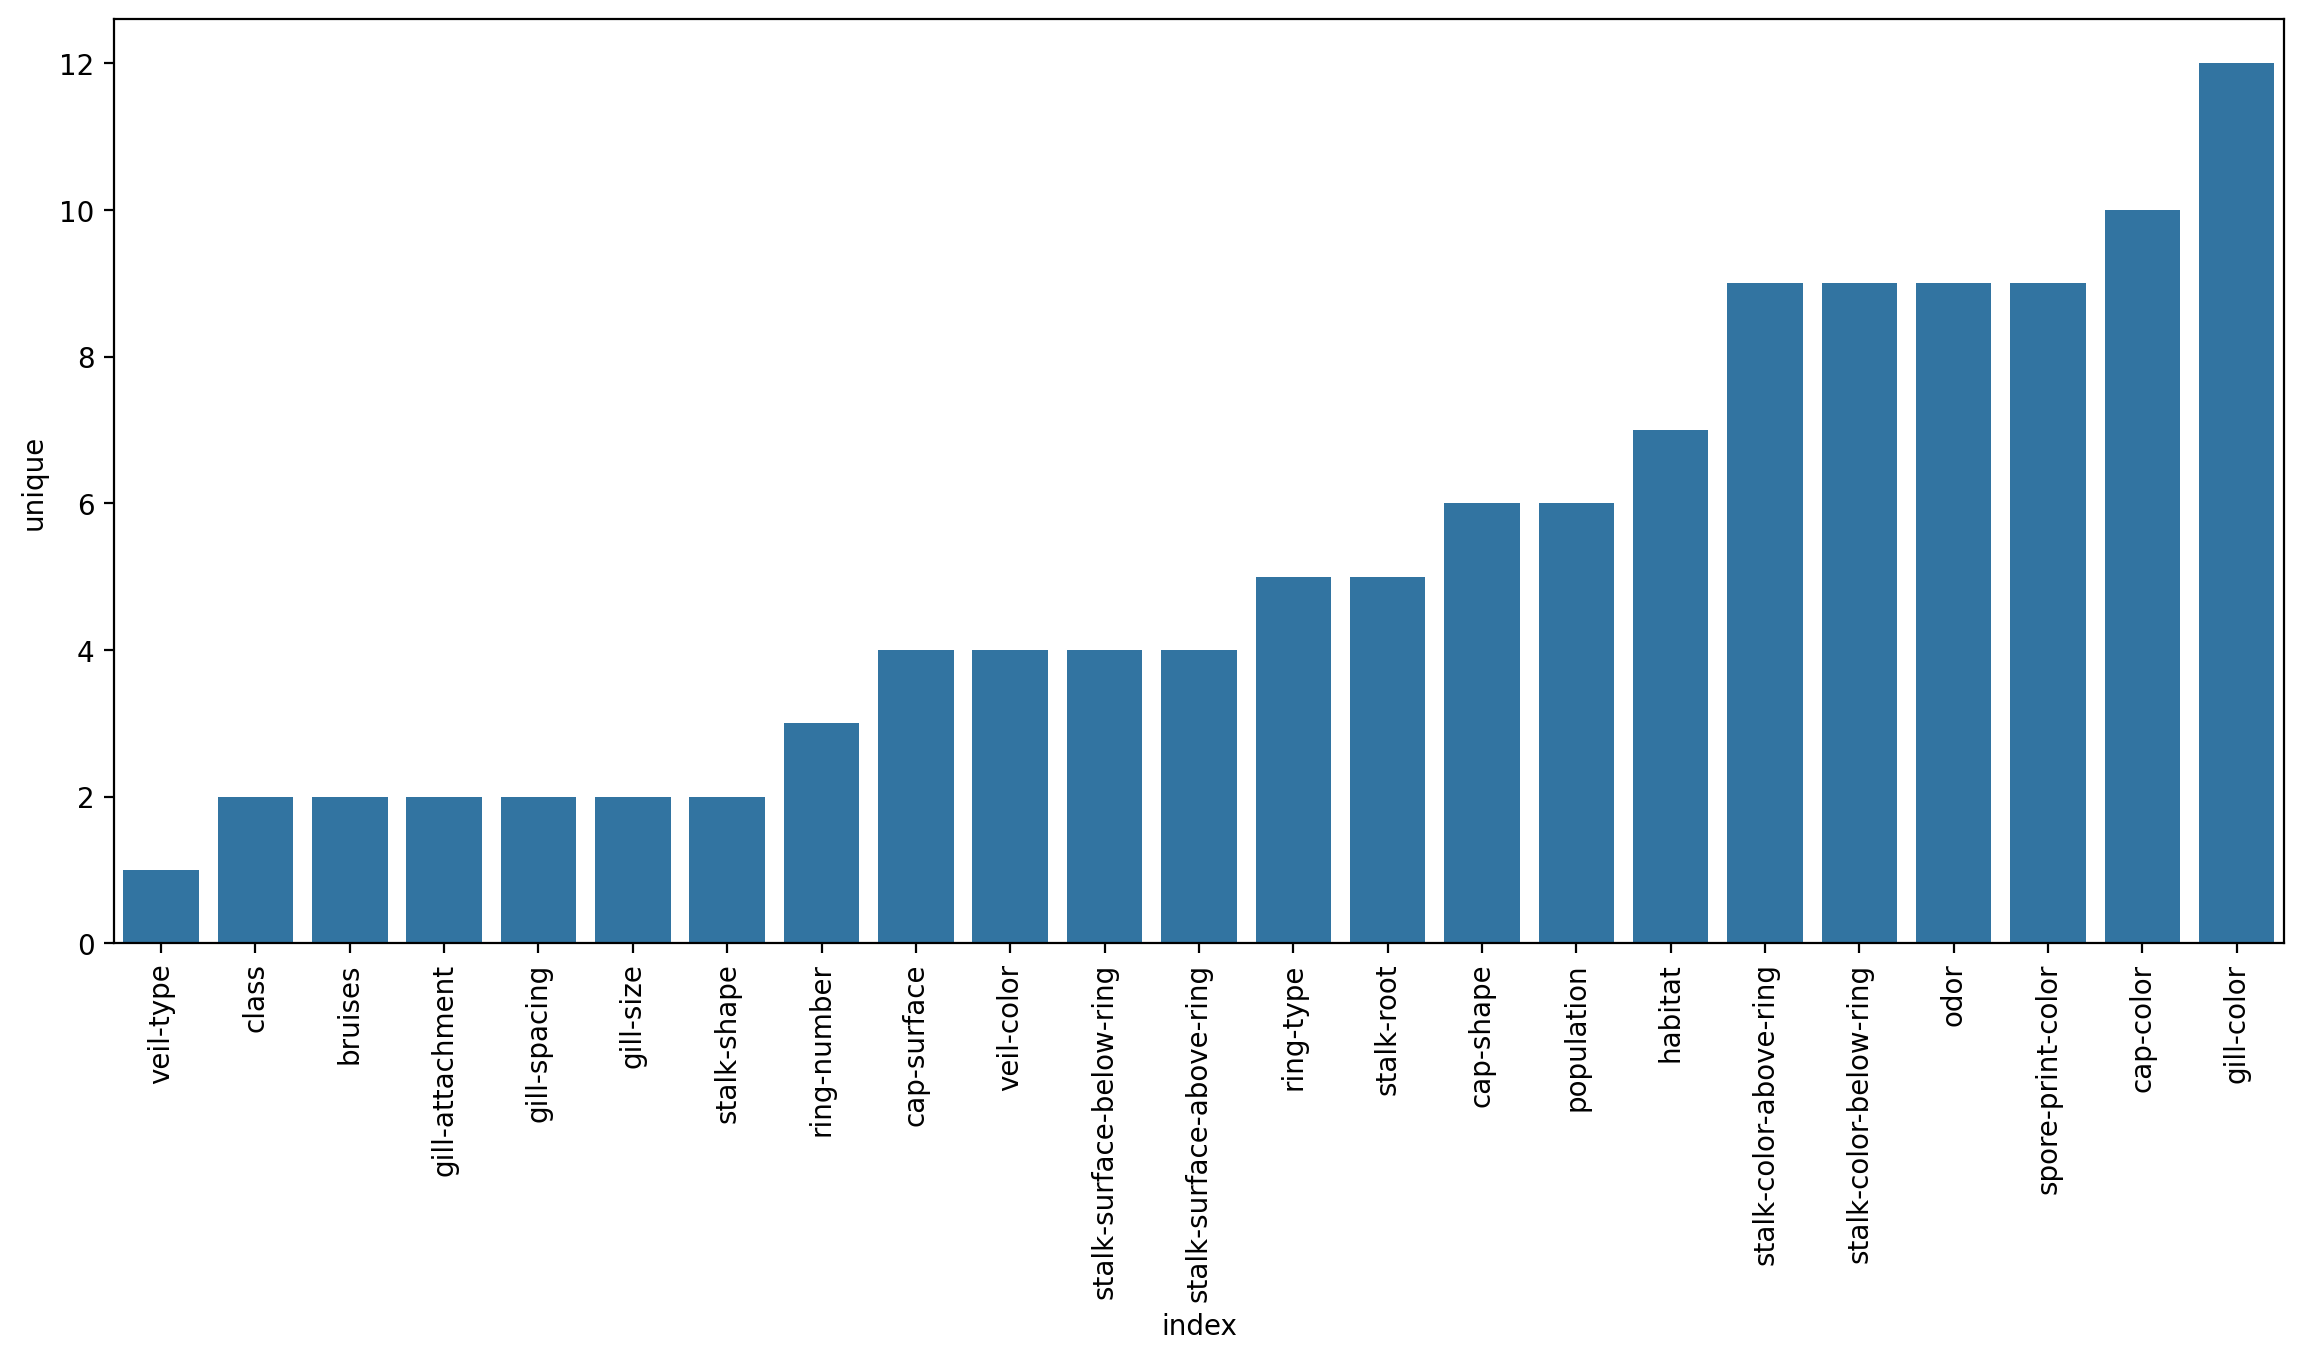

In [16]:
plt.figure(figsize=(14,6),dpi= 200)
plt.xticks(rotation=90)
sns.barplot(data = feat_uniq , x= 'index',y='unique')

In [17]:
X = df.drop('class',axis=1)
X.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


In [18]:
X = pd.get_dummies(X,drop_first=True)
y=df['class']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [20]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

pred = model.predict(X_test)

print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           e       0.81      0.96      0.88       552
           p       0.96      0.81      0.88       667

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [22]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
model.feature_importances_.argmax()

np.int64(22)

In [24]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

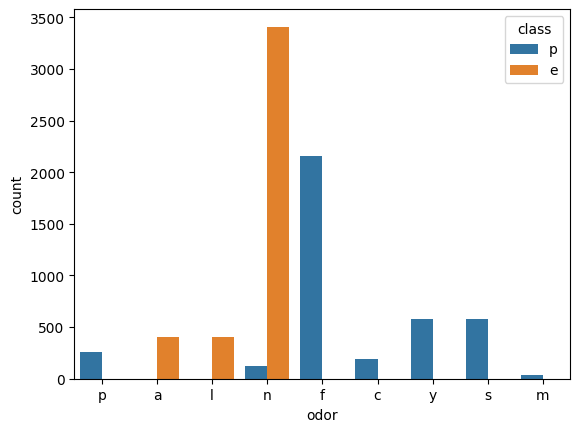

In [25]:
sns.countplot(data=df,x='odor',hue='class')

In [26]:
len(X.columns)

95

In [30]:
error_rates= []

from sklearn.metrics import accuracy_score

for n in range(1,len(X.columns)+1):
  model = AdaBoostClassifier(n_estimators=n)
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  err = 1 - accuracy_score(y_test,preds)

  error_rates.append(err)

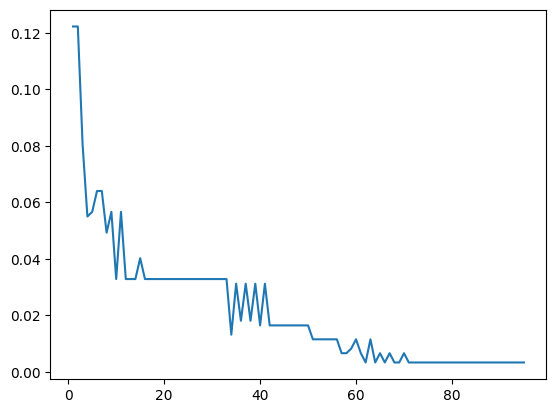

In [31]:
plt.plot(range(1,len(X.columns)+1),error_rates)

In [32]:
model

AdaBoostClassifier(n_estimators=95)

In [33]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [34]:
feats = pd.DataFrame(index=X.columns, data = model.feature_importances_ , columns=['Importances'])

In [37]:
imp_feat = feats[feats['Importances']>0].sort_values("Importances")

<Axes: xlabel='None', ylabel='Importances'>

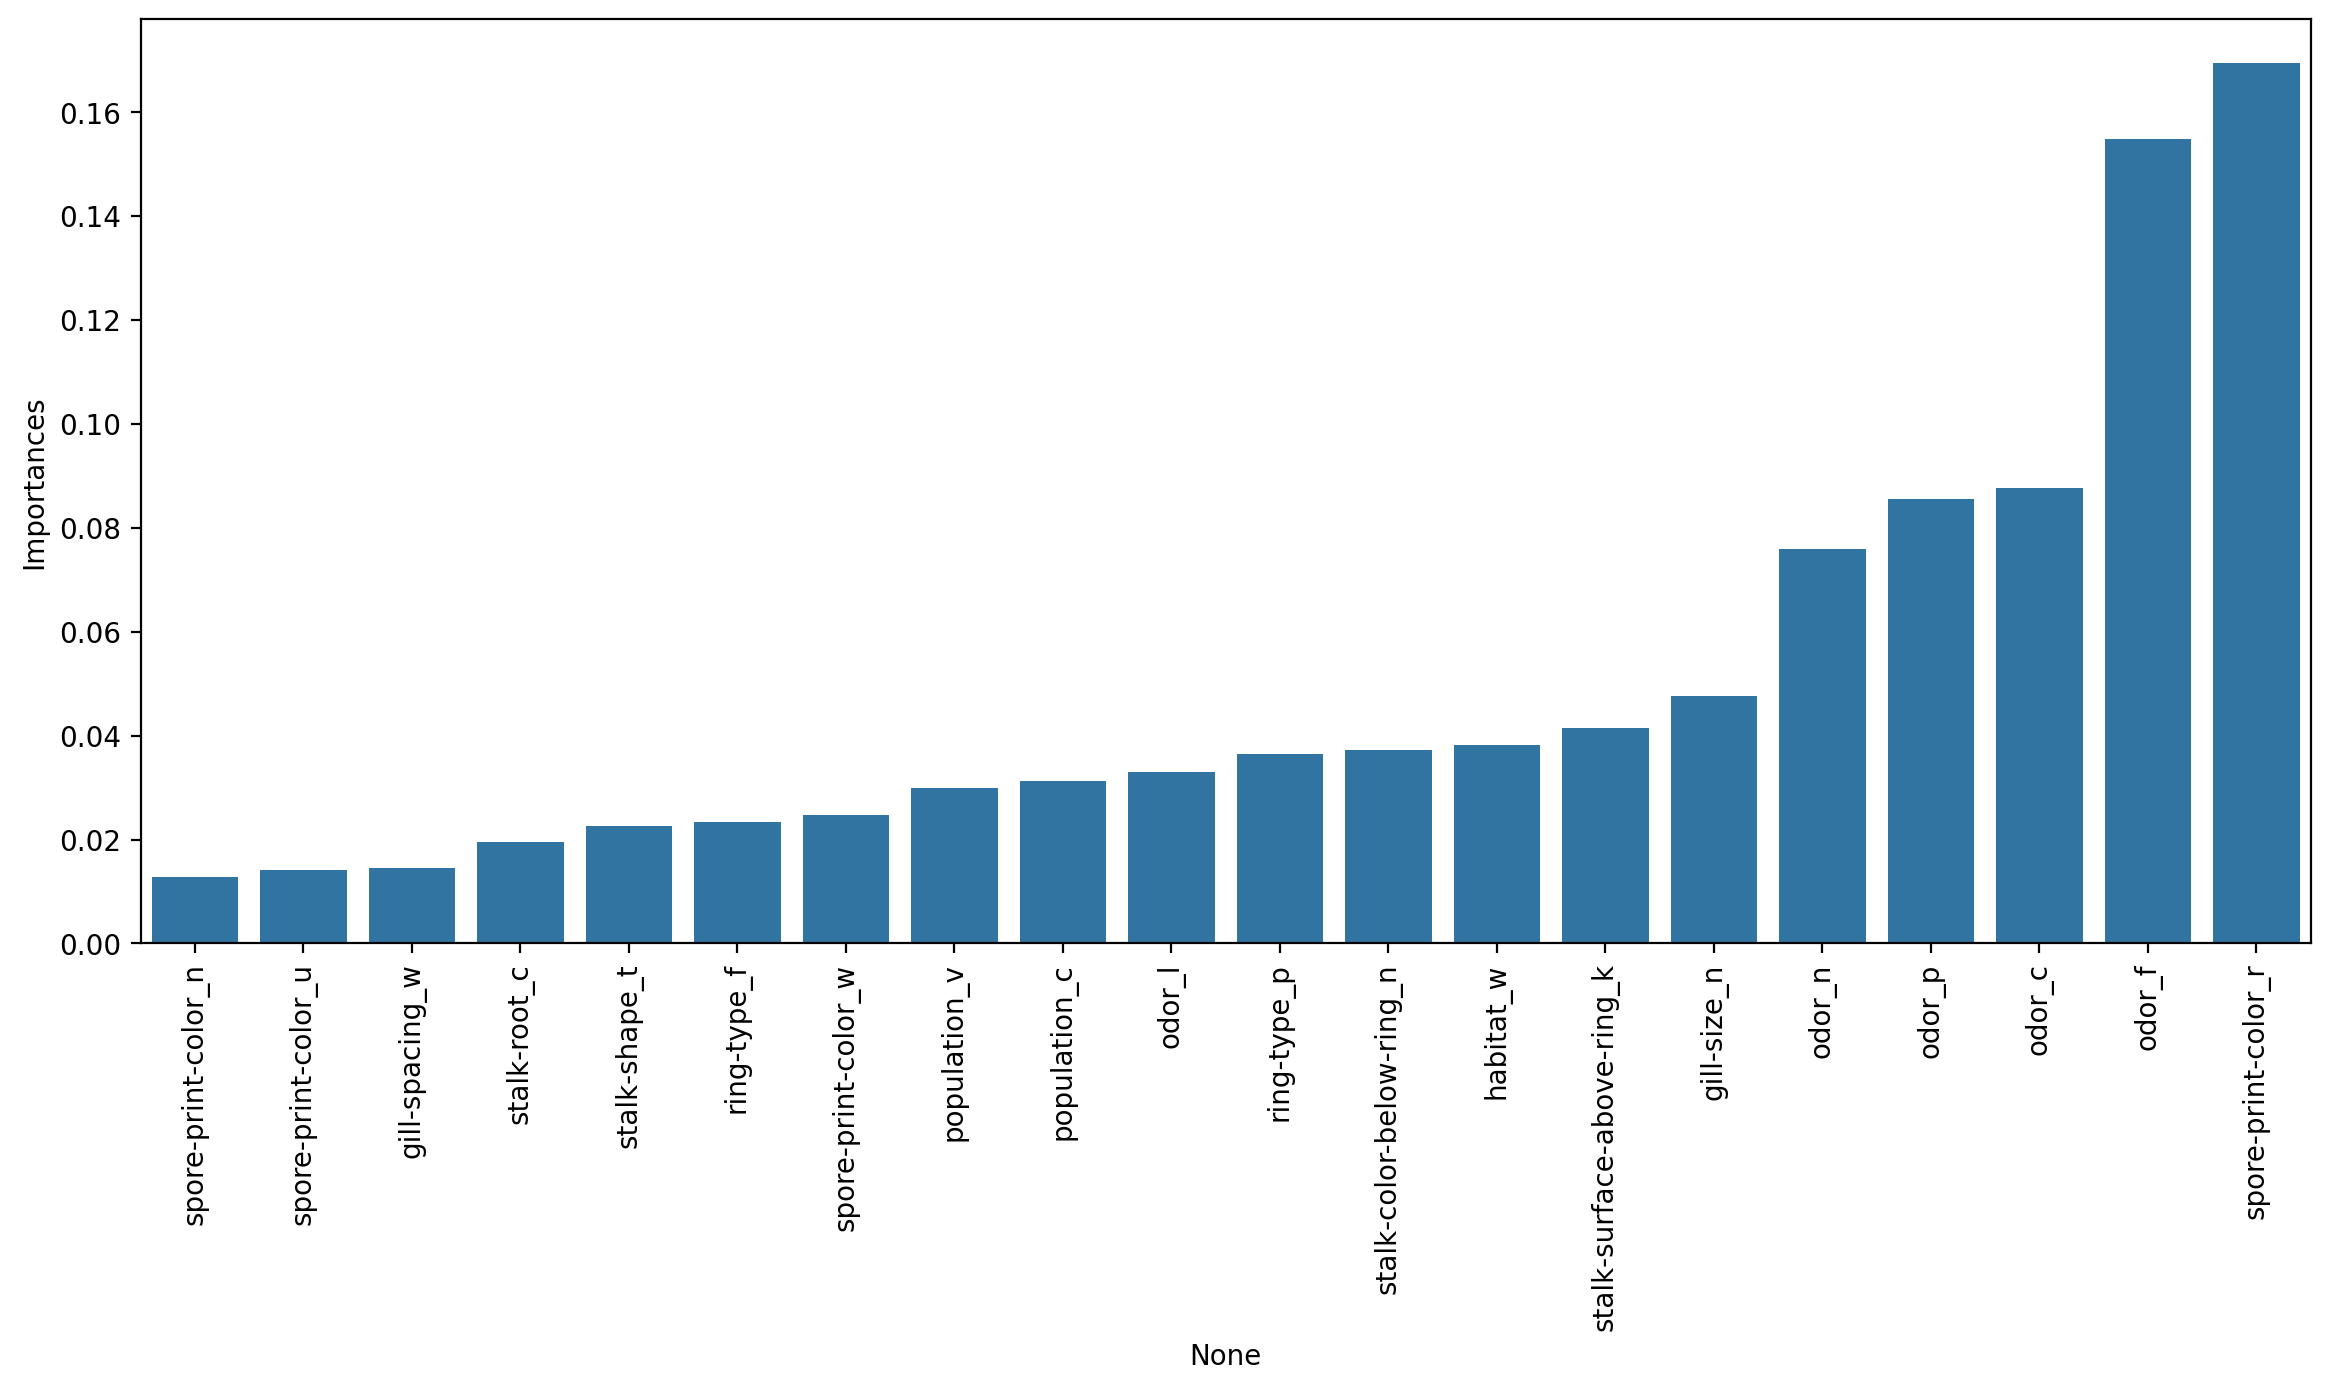

In [38]:
plt.figure(figsize=(14,6),dpi= 200)
plt.xticks(rotation=90)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importances')

<Axes: xlabel='None', ylabel='Importances'>

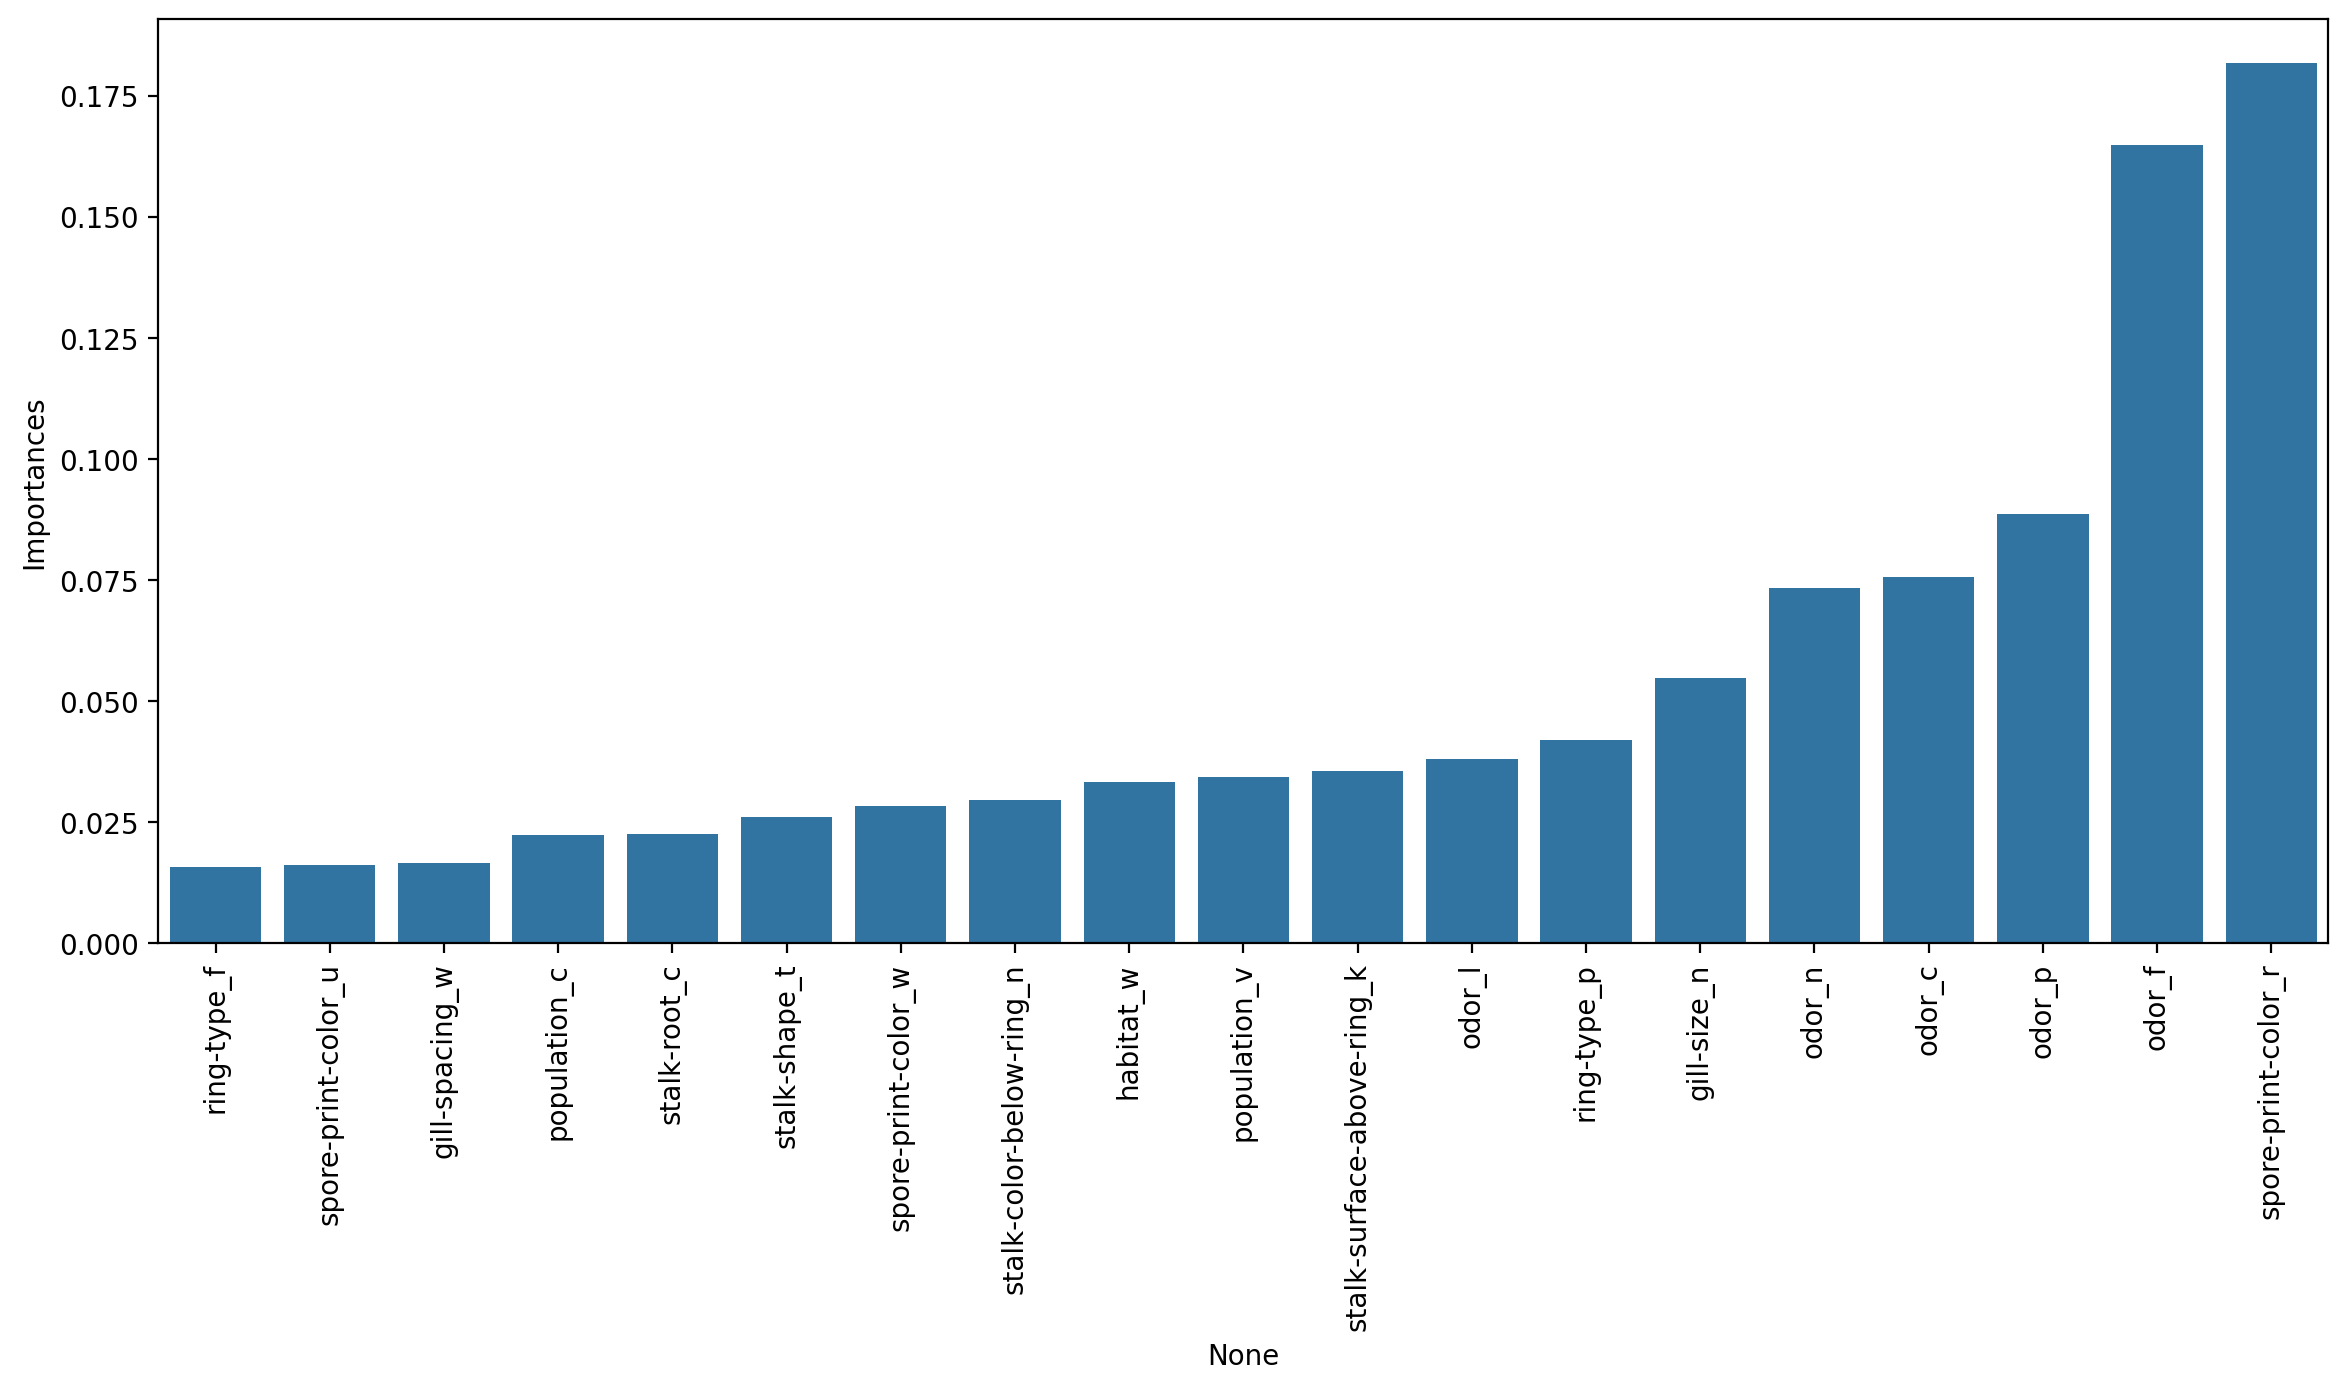

In [41]:
model = AdaBoostClassifier(n_estimators = 80)
model.fit(X_train,y_train)
preds = model.predict(X_test)
feats = pd.DataFrame(index=X.columns, data = model.feature_importances_ , columns=['Importances'])
imp_feat = feats[feats['Importances']>0].sort_values("Importances")
plt.figure(figsize=(14,6),dpi= 200)
plt.xticks(rotation=90)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importances')